In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout




In [3]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
X_train, X_test, y_train, y_test= train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train= to_categorical(y_train,43)
y_test= to_categorical(y_test,43)

Error loading image
(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 87s 87ms/step - loss: 4.0369 - accuracy: 0.2440 - val_loss: 1.1673 - val_accuracy: 0.6866
Epoch 2/15
981/981 [==============================] - 74s 75ms/step - loss: 1.3450 - accuracy: 0.5995 - val_loss: 0.3968 - val_accuracy: 0.8922
Epoch 3/15
981/981 [==============================] - 74s 76ms/step - loss: 0.7032 - accuracy: 0.7854 - val_loss: 0.2216 - val_accuracy: 0.9336
Epoch 4/15
981/981 [==============================] - 66s 67ms/step - loss: 0.4809 - accuracy: 0.8545 - val_loss: 0.1545 - val_accuracy: 0.9528
Epoch 5/15
981/981 [==============================] - 70s 71ms/step - loss: 0.3627 - accuracy: 0.8911 - val_loss: 0.1519 - val_accuracy: 0.9540
Epoch 6/15
981/981 [==============================] - 68s 70ms/step - loss: 0.3211 - accuracy: 0.9040 - val_loss: 0.1251 - val_accuracy: 0.9620
Epoch 7/15
981/981 [==============================] - 67s 69ms/step - loss: 0.2898 - accuracy: 0.9122 - val_loss: 0.1047 - val_accuracy:

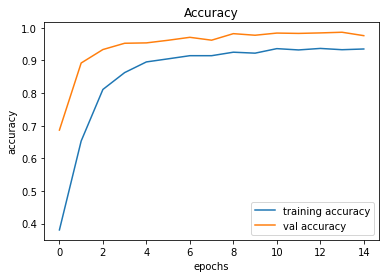

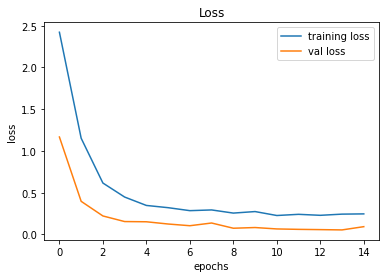

In [6]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save("traffic_classifier.h5")

/Users/yagmurkahya/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9361836896278701
